   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

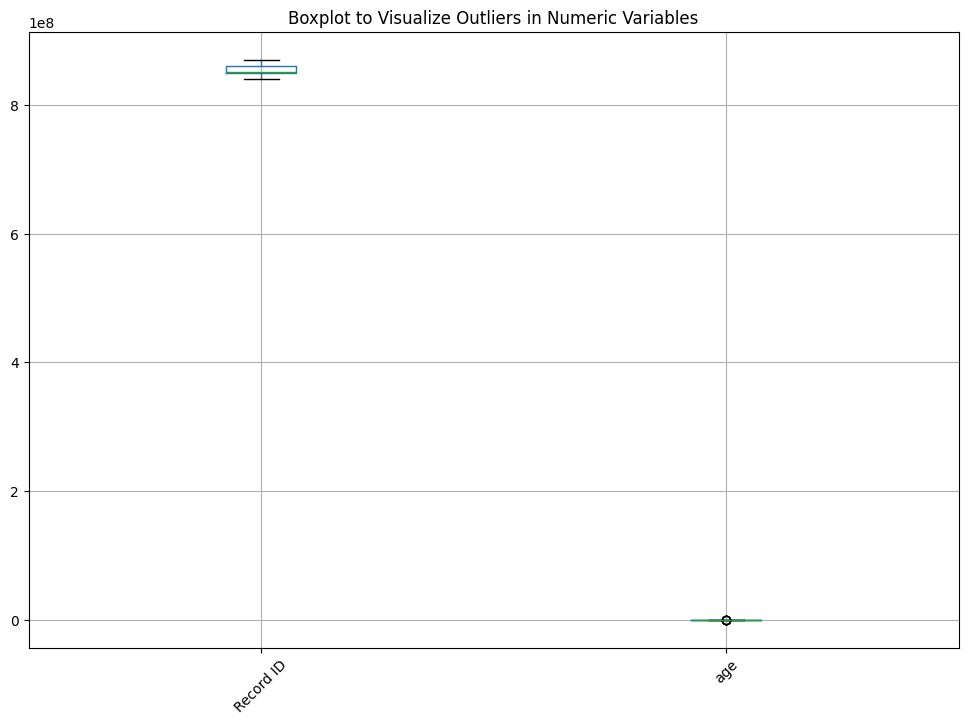

Mean and Variance of Numeric Variables:
         Record ID           age
mean  8.529473e+08  7.355582e+01
var   5.748625e+13  1.401801e+06
Missing Values after Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                   

In [15]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load the data from the Excel file
file_path = r"C:\Users\pavan\Downloads\Lab Session Data.xlsx"

# Load the data from the "thyroid0387_UCI" sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Display the first few rows to understand its structure
print(thyroid_data.head())

# A5.1: Study each attribute and associated values to identify the datatype
attribute_info = thyroid_data.dtypes
print(f"Attribute Information:\n{attribute_info}")

# A5.2: For categorical attributes, identify the encoding scheme
# We'll display the categorical columns to understand them
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns
print(f"Categorical Columns:\n{categorical_columns}")

# A5.3: Study the data range for numeric variables
numeric_columns = thyroid_data.select_dtypes(include=[np.number]).columns
print(f"Numeric Columns and their Data Range:\n{thyroid_data[numeric_columns].describe()}")

# A5.4: Study the presence of missing values in each attribute
missing_values = thyroid_data.isnull().sum()
print(f"Missing Values in Each Attribute:\n{missing_values}")

# A5.5: Study the presence of outliers in numeric data
# We'll use boxplot to visualize outliers
thyroid_data[numeric_columns].boxplot(figsize=(12,8))
plt.xticks(rotation=45)
plt.title('Boxplot to Visualize Outliers in Numeric Variables')
plt.show()

# A5.6: For numeric variables, calculate the mean and variance
mean_variance = thyroid_data[numeric_columns].agg(['mean', 'var'])
print(f"Mean and Variance of Numeric Variables:\n{mean_variance}")


# A6: Data Imputation

# Impute missing values for numeric columns without outliers using the mean
for column in numeric_columns:
    if thyroid_data[column].isnull().sum() > 0:
        # Check for outliers using the IQR method
        Q1 = thyroid_data[column].quantile(0.25)
        Q3 = thyroid_data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((thyroid_data[column] < (Q1 - 1.5 * IQR)) | (thyroid_data[column] > (Q3 + 1.5 * IQR)))
        
        if outliers.any():
            # Impute with median if outliers are present
            thyroid_data[column].fillna(thyroid_data[column].median(), inplace=True)
        else:
            # Impute with mean if no outliers are present
            thyroid_data[column].fillna(thyroid_data[column].mean(), inplace=True)

# Impute missing values for categorical columns using the mode
for column in categorical_columns:
    if thyroid_data[column].isnull().sum() > 0:
        thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)

# Verify if all missing values are imputed
missing_values_after_imputation = thyroid_data.isnull().sum()
print(f"Missing Values after Imputation:\n{missing_values_after_imputation}")


def task_a7(thyroid_data):
    # Normalize numeric columns that need normalization
    columns_to_normalize = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']  

    # Choose normalization technique: MinMaxScaler or StandardScaler
    scaler = MinMaxScaler()  # StandardScaler() can be used if needed

    thyroid_data[columns_to_normalize] = scaler.fit_transform(thyroid_data[columns_to_normalize])

    # Print the normalized data to verify
    print("A7: Data after Normalization:")
    print(thyroid_data[columns_to_normalize].head())

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def calculate_jc_smc_cos(data):
    # Initialize matrices to store similarity values
    num_vectors = len(data)
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    cos_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(num_vectors):
            if i == j:
                # Diagonal elements, similarity with itself, assign 1
                jc_matrix[i][j] = 1.0
                smc_matrix[i][j] = 1.0
                cos_matrix[i][j] = 1.0
            else:
                # Binary vector calculation for JC and SMC
                binary_vector1 = data.iloc[i].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else np.nan)).fillna(0)
                binary_vector2 = data.iloc[j].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else np.nan)).fillna(0)

                # Calculate f11, f01, f10, f00
                f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
                f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))
                f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
                f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))

                # Jaccard Coefficient
                denominator_jc = f01 + f10 + f11
                jc_matrix[i][j] = f11 / denominator_jc if denominator_jc > 0 else np.nan

                # Simple Matching Coefficient
                smc_matrix[i][j] = (f11 + f00) / (f00 + f01 + f10 + f11)

                # Cosine Similarity
                try:
                    vector1 = np.array(data.iloc[i], dtype=float).reshape(1, -1)
                    vector2 = np.array(data.iloc[j], dtype=float).reshape(1, -1)
                    cos_matrix[i][j] = cosine_similarity(vector1, vector2)[0][0]
                except ValueError:
                    cos_matrix[i][j] = np.nan

    return jc_matrix, smc_matrix, cos_matrix

def task_a8_a9(thyroid_data):
    # Task A8: Calculate Simple Matching Coefficient (SMC)
    vector1 = thyroid_data.iloc[0]
    vector2 = thyroid_data.iloc[1]

    # Replace non-numeric values if any
    vector1 = vector1.replace({'F': 0, 'M': 1})
    vector2 = vector2.replace({'F': 0, 'M': 1})

    smc = np.sum(vector1 == vector2) / len(vector1)
    print(f"A8: Simple Matching Coefficient (SMC): {smc}")

    # Task A9: Calculate Cosine Similarity
    # Convert vectors to numeric
    vector1 = pd.to_numeric(vector1, errors='coerce').fillna(0).values.reshape(1, -1)
    vector2 = pd.to_numeric(vector2, errors='coerce').fillna(0).values.reshape(1, -1)
    
    cosine_sim = cosine_similarity(vector1, vector2)[0][0]
    print(f"A9: Cosine Similarity (COS): {cosine_sim}")


def plot_heatmaps(jc_matrix, smc_matrix, cos_matrix):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, ax=axs[0], annot=True, cmap='coolwarm', square=True)
    axs[0].set_title('Jaccard Coefficient Heatmap')

    sns.heatmap(smc_matrix, ax=axs[1], annot=True, cmap='coolwarm', square=True)
    axs[1].set_title('Simple Matching Coefficient Heatmap')

    sns.heatmap(cos_matrix, ax=axs[2], annot=True, cmap='coolwarm', square=True)
    axs[2].set_title('Cosine Similarity Heatmap')

    plt.tight_layout()
    plt.show()

def main():
    # Load the data
    file_path = r"C:\Users\pavan\Downloads\Lab Session Data.xlsx"
    thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Perform tasks A8 and A9
    task_a8_a9(thyroid_data)

    # Consider only the first 20 observation vectors for heatmap generation
    thyroid_data_subset = thyroid_data.head(20)

    # Calculate JC, SMC, and Cosine Similarity for the subset
    jc_matrix, smc_matrix, cos_matrix = calculate_jc_smc_cos(thyroid_data_subset)

    # Plot the heatmaps
    plot_heatmaps(jc_matrix, smc_matrix, cos_matrix)


if _name_ == "_main_":
    main()

NameError: name '_name_' is not defined